In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

------------------------------
## **1. 데이터 전처리**
- 2023_교통사고_현황.xlsx
- 경찰청_음주운전_2023.csv
- 2019~23_음주운전사고 다발지정보.csv

----------------------
### **1.1 `데이터1`: 2023년 전국 경찰청별 음주운전 적발 데이터**
- 전국에서 서울특별시만 추출

In [51]:
## 1. 데이터 로드 및 구조와 정보 확인
# 2023년 전국 경찰청별 음주운전 적발 데이터터
dd_caught = pd.read_csv('./DATA/경찰청_음주운전_2023.csv',encoding='euc-kr', index_col='연번')
dd_caught.head()

,성별,적발횟수,나이,알콜농도,측정거부,측정일시,관할경찰서
연번,,,,,,,
1,남자,1,31,0.136,N,2023-01-01 0:03,수원남부경찰서
2,남자,3,56,0.065,N,2023-01-01 0:04,일산동부경찰서
3,남자,1,34,0.094,N,2023-01-01 0:06,수원서부경찰서
4,남자,1,35,0.191,N,2023-01-01 0:10,분당경찰서
5,남자,1,28,0.043,N,2023-01-01 0:13,천안서북경찰서


In [52]:
dd_caught.info() # 데이터정보

<class 'pandas.core.frame.DataFrame'>
Index: 125231 entries, 1 to 125231
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   성별      125231 non-null  object 
 1   적발횟수    125231 non-null  int64  
 2   나이      125231 non-null  object 
 3   알콜농도    125231 non-null  float64
 4   측정거부    125231 non-null  object 
 5   측정일시    125231 non-null  object 
 6   관할경찰서   125231 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.6+ MB


In [53]:
dd_caught.shape # 전국 125231개 행, 7개 열

(125231, 7)

In [54]:
## 2. 날짜 및 시간 처리 후 열 생성성
# 월, 일, 시간, 분 추출하여 열 추가
dd_caught['측정일시'] = pd.to_datetime(dd_caught['측정일시'])
dd_caught['월'] = dd_caught['측정일시'].dt.month
dd_caught['일'] = dd_caught['측정일시'].dt.day
dd_caught['시간'] = dd_caught['측정일시'].dt.hour
dd_caught['분'] = dd_caught['측정일시'].dt.minute
dd_caught.head()

,성별,적발횟수,나이,알콜농도,측정거부,측정일시,관할경찰서,월,일,시간,분
연번,,,,,,,,,,,
1,남자,1,31,0.136,N,2023-01-01 00:03:00,수원남부경찰서,1,1,0,3
2,남자,3,56,0.065,N,2023-01-01 00:04:00,일산동부경찰서,1,1,0,4
3,남자,1,34,0.094,N,2023-01-01 00:06:00,수원서부경찰서,1,1,0,6
4,남자,1,35,0.191,N,2023-01-01 00:10:00,분당경찰서,1,1,0,10
5,남자,1,28,0.043,N,2023-01-01 00:13:00,천안서북경찰서,1,1,0,13


In [55]:
# 요일을 추출하여 새로운 열 추가하고 요일명으로 값 변경
dd_caught['요일'] = dd_caught['측정일시'].dt.dayofweek
day_names = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
dd_caught.replace({'요일':day_names}, inplace=True)
dd_caught.head()

,성별,적발횟수,나이,알콜농도,측정거부,측정일시,관할경찰서,월,일,시간,분,요일
연번,,,,,,,,,,,,
1,남자,1,31,0.136,N,2023-01-01 00:03:00,수원남부경찰서,1,1,0,3,일
2,남자,3,56,0.065,N,2023-01-01 00:04:00,일산동부경찰서,1,1,0,4,일
3,남자,1,34,0.094,N,2023-01-01 00:06:00,수원서부경찰서,1,1,0,6,일
4,남자,1,35,0.191,N,2023-01-01 00:10:00,분당경찰서,1,1,0,10,일
5,남자,1,28,0.043,N,2023-01-01 00:13:00,천안서북경찰서,1,1,0,13,일


In [56]:
## 3. 나이/성별의 결측치 처리
# 나이가 '불명'인 행 삭제, object형에서 int형 변환
dd_caught['나이'].replace('불명', np.nan, inplace=True)
dd_caught.dropna(subset=['나이'], axis=0, inplace=True)
dd_caught['나이'] = dd_caught['나이'].astype('int')
dd_caught['나이'].dtypes

C:\Users\chs02\AppData\Local\Temp\ipykernel_1696\995643284.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd_caught['나이'].replace('불명', np.nan, inplace=True)


dtype('int64')

In [57]:
## 4. 연령대/count 열 생성성
# 연령대 열 생성
bins = [0, 19, 29, 39, 49, 59, 69, 100]  # 나이 범위
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상']  # 범주 레이블
dd_caught['연령대'] = pd.cut(dd_caught['나이'], bins=bins, labels=labels, include_lowest=True)
dd_caught.head()

,성별,적발횟수,나이,알콜농도,측정거부,측정일시,관할경찰서,월,일,시간,분,요일,연령대
연번,,,,,,,,,,,,,
1,남자,1,31,0.136,N,2023-01-01 00:03:00,수원남부경찰서,1,1,0,3,일,30대
2,남자,3,56,0.065,N,2023-01-01 00:04:00,일산동부경찰서,1,1,0,4,일,50대
3,남자,1,34,0.094,N,2023-01-01 00:06:00,수원서부경찰서,1,1,0,6,일,30대
4,남자,1,35,0.191,N,2023-01-01 00:10:00,분당경찰서,1,1,0,10,일,30대
5,남자,1,28,0.043,N,2023-01-01 00:13:00,천안서북경찰서,1,1,0,13,일,20대


In [58]:
# 성별이 '불명'인 행 삭제 
dd_caught['성별'].replace('불명',np.nan, inplace=True)
dd_caught_seoul = dd_caught.dropna(subset=['성별'], axis=0)

dd_caught['count'] = 1 # 카운트 열 추가
dd_caught.head() 

C:\Users\chs02\AppData\Local\Temp\ipykernel_1696\747876639.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd_caught['성별'].replace('불명',np.nan, inplace=True)


,성별,적발횟수,나이,알콜농도,측정거부,측정일시,관할경찰서,월,일,시간,분,요일,연령대,count
연번,,,,,,,,,,,,,,
1,남자,1,31,0.136,N,2023-01-01 00:03:00,수원남부경찰서,1,1,0,3,일,30대,1
2,남자,3,56,0.065,N,2023-01-01 00:04:00,일산동부경찰서,1,1,0,4,일,50대,1
3,남자,1,34,0.094,N,2023-01-01 00:06:00,수원서부경찰서,1,1,0,6,일,30대,1
4,남자,1,35,0.191,N,2023-01-01 00:10:00,분당경찰서,1,1,0,10,일,30대,1
5,남자,1,28,0.043,N,2023-01-01 00:13:00,천안서북경찰서,1,1,0,13,일,20대,1


In [59]:
## 5. 서울시 데이터 필터링
# 서울시 데이터 추출
dd_caught_seoul = dd_caught[dd_caught['관할경찰서'].str.contains('서울')]
dd_caught_seoul.reset_index(drop=True, inplace=True)
dd_caught_seoul

,성별,적발횟수,나이,알콜농도,측정거부,측정일시,관할경찰서,월,일,시간,분,요일,연령대,count
0,남자,5,50,0.075,N,2023-01-01 00:44:00,서울성북경찰서,1,1,0,44,일,50대,1
1,남자,1,27,0.134,N,2023-01-01 01:36:00,서울마포경찰서,1,1,1,36,일,20대,1
2,남자,3,52,0.115,N,2023-01-01 01:44:00,서울종암경찰서,1,1,1,44,일,50대,1
3,남자,1,29,0.184,N,2023-01-01 02:08:00,서울마포경찰서,1,1,2,8,일,20대,1
4,남자,3,43,0.106,N,2023-01-01 02:19:00,서울서초경찰서,1,1,2,19,일,40대,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14755,남자,2,28,0.130,N,2023-12-31 14:27:00,서울중부경찰서,12,31,14,27,일,20대,1
14756,남자,1,48,0.172,N,2023-12-31 15:49:00,서울은평경찰서,12,31,15,49,일,40대,1
14757,남자,3,53,0.205,N,2023-12-31 22:10:00,서울은평경찰서,12,31,22,10,일,50대,1
14758,남자,3,67,0.194,N,2023-12-31 22:28:00,서울강서경찰서,12,31,22,28,일,60대,1


In [60]:
## 서울시 적발횟수, 나이, 알콜농도 기초통계정보 확인
dd_caught_seoul.loc[:,dd_caught_seoul.columns.isin(['적발횟수', '나이', '알콜농도'])].describe().round(2)

,적발횟수,나이,알콜농도
count,14760.00,14760.00,14760.00
mean,1.59,40.23,0.12
std,1.02,12.03,0.06
min,1.00,14.00,0.00
25%,1.00,31.00,0.08
50%,1.00,39.00,0.12
75%,2.00,49.00,0.15
max,15.00,88.00,0.96


###

---------------------

### **1.2 `데이터2`: 2023년 서울시 음주운전 교통사고 데이터**

In [61]:
## 1. 데이터 로드 및 구조와 정보 확인
# 2023년 서울시 음주운전 교통사고 데이터
dd_accidents = pd.read_excel('./DATA/음주운전_2023_교통사고_현황.xlsx', header=1)
dd_accidents.head()

c:\Users\chs02\OneDrive\바탕 화면\python_vs\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구별(1),자치구별(2),발생건수 (건),사망자수 (명),부상자수 (명)
0,서울시,소계,1938,8,3113
1,NaN,종로구,52,-,73
2,NaN,중구,37,-,55
3,NaN,용산구,64,2,114
4,NaN,성동구,50,-,102


In [62]:
dd_accidents.info() # 데이터 기본 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   자치구별(1)   1 non-null      object
 1   자치구별(2)   26 non-null     object
 2   발생건수 (건)  26 non-null     int64 
 3   사망자수 (명)  26 non-null     object
 4   부상자수 (명)  26 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ KB


In [63]:
dd_accidents.shape # 데이터 26개 행, 5개 열

(26, 5)

In [64]:
## 2. 불필요한 행/열 삭제
# 자치구별(1)의 값이 모두 동일하므로 삭제
dd_accidents.drop('자치구별(1)', axis=1, inplace=True)
dd_accidents.head()

,자치구별(2),발생건수 (건),사망자수 (명),부상자수 (명)
0,소계,1938,8,3113
1,종로구,52,-,73
2,중구,37,-,55
3,용산구,64,2,114
4,성동구,50,-,102


In [65]:
# 소계 - 0행 삭제
dd_accidents.drop(0, axis=0, inplace=True)
dd_accidents.head()

,자치구별(2),발생건수 (건),사망자수 (명),부상자수 (명)
1,종로구,52,-,73
2,중구,37,-,55
3,용산구,64,2,114
4,성동구,50,-,102
5,광진구,57,-,82


In [66]:
## 3. 행/열 인덱스명 변경
# 자치구별(2) 열 이름 변경
dd_accidents.rename({'자치구별(2)':'서울자치구'}, axis=1, inplace=True)
dd_accidents.head()

,서울자치구,발생건수 (건),사망자수 (명),부상자수 (명)
1,종로구,52,-,73
2,중구,37,-,55
3,용산구,64,2,114
4,성동구,50,-,102
5,광진구,57,-,82


In [67]:
# 행 인덱스 변경
dd_accidents.set_index('서울자치구', inplace=True)
dd_accidents.head()

,발생건수 (건),사망자수 (명),부상자수 (명)
서울자치구,,,
종로구,52,-,73
중구,37,-,55
용산구,64,2,114
성동구,50,-,102
광진구,57,-,82


In [68]:
# 열 인덱스 이름 변경 (변수 이름 쉽게 코딩 하기위해)
dd_accidents.columns = ['발생건수', '사망자', '부상자']
dd_accidents.head()

,발생건수,사망자,부상자
서울자치구,,,
종로구,52,-,73
중구,37,-,55
용산구,64,2,114
성동구,50,-,102
광진구,57,-,82


In [69]:
## 4. 사망자의 결측치 및 데이터 형식 처리
# 사망자 열의 '-'를 0으로 변경, object형을 int형으로 변환
dd_accidents['사망자'].replace('-', np.nan, inplace=True)
dd_accidents.fillna(0, inplace=True)
dd_accidents['사망자'] = dd_accidents['사망자'].astype('int')
dd_accidents.head()

C:\Users\chs02\AppData\Local\Temp\ipykernel_1696\2417924296.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dd_accidents['사망자'].replace('-', np.nan, inplace=True)
C:\Users\chs02\AppData\Local\Temp\ipykernel_1696\2417924296.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dd_accidents['사망자'].r

,발생건수,사망자,부상자
서울자치구,,,
종로구,52,0,73
중구,37,0,55
용산구,64,2,114
성동구,50,0,102
광진구,57,0,82


In [70]:
## 5. 사상자 열 추가
dd_accidents['사상자'] = dd_accidents['사망자'] + dd_accidents['부상자']
dd_accidents

,발생건수,사망자,부상자,사상자
서울자치구,,,,
종로구,52,0,73,73
중구,37,0,55,55
용산구,64,2,114,116
성동구,50,0,102,102
광진구,57,0,82,82
동대문구,56,1,74,75
중랑구,57,0,98,98
성북구,37,0,50,50
강북구,36,0,61,61


### **1.2.5 `데이터1과 데이터2의 병합`**
-  2023년 서울시 음주운전 교통사고 데이터 + 2023년 전국 경찰청별 음주운전 적발 데이터

In [71]:
# 경찰서별 자치구 딕셔너리
police_stations = {
    '서울강남경찰서': '강남구',
    '서울강동경찰서': '강동구',
    '서울강북경찰서': '강북구',
    '서울강서경찰서': '강서구',
    '서울관악경찰서': '관악구',
    '서울광진경찰서': '광진구',
    '서울구로경찰서': '구로구',
    '서울금천경찰서': '금천구',
    '서울남대문경찰서': '중구',
    '서울노원경찰서': '노원구',
    '서울도봉경찰서': '도봉구',
    '서울동대문경찰서': '동대문구',
    '서울동작경찰서': '동작구',
    '서울마포경찰서': '마포구',
    '서울방배경찰서': '서초구',
    '서울서대문경찰서': '서대문구',
    '서울서부경찰서': '은평구',
    '서울서초경찰서': '서초구',
    '서울성동경찰서': '성동구',
    '서울성북경찰서': '성북구',
    '서울송파경찰서': '송파구',
    '서울수서경찰서': '강남구',
    '서울양천경찰서': '양천구',
    '서울영등포경찰서': '영등포구',
    '서울용산경찰서': '용산구',
    '서울은평경찰서': '은평구',
    '서울종로경찰서': '종로구',
    '서울종암경찰서': '성북구',
    '서울중랑경찰서': '중랑구',
    '서울중부경찰서': '중구',
    '서울혜화경찰서': '종로구'
}

# police 데이터프레임 생성 
police = pd.DataFrame([police_stations]).transpose()   # 전치
police = police.reset_index()   # 인덱스 재설정
police.rename({'index':'관할경찰서', 0:'자치구'}, axis=1, inplace=True) # 열 이름 변경
police.head()

,관할경찰서,자치구
0,서울강남경찰서,강남구
1,서울강동경찰서,강동구
2,서울강북경찰서,강북구
3,서울강서경찰서,강서구
4,서울관악경찰서,관악구


In [72]:
# 관할경찰서를 기준으로 left 병합 - 데이터1에 관할경찰서 자치구 열 추가
dd_caught_seoul = pd.merge(dd_caught_seoul, police, on='관할경찰서', how='left')
dd_caught_seoul.head()

,성별,적발횟수,나이,알콜농도,측정거부,측정일시,관할경찰서,월,일,시간,분,요일,연령대,count,자치구
0,남자,5,50,0.075,N,2023-01-01 00:44:00,서울성북경찰서,1,1,0,44,일,50대,1,성북구
1,남자,1,27,0.134,N,2023-01-01 01:36:00,서울마포경찰서,1,1,1,36,일,20대,1,마포구
2,남자,3,52,0.115,N,2023-01-01 01:44:00,서울종암경찰서,1,1,1,44,일,50대,1,성북구
3,남자,1,29,0.184,N,2023-01-01 02:08:00,서울마포경찰서,1,1,2,8,일,20대,1,마포구
4,남자,3,43,0.106,N,2023-01-01 02:19:00,서울서초경찰서,1,1,2,19,일,40대,1,서초구


In [73]:
# 교통사고 현황 데이터[데이터2]에 자치구별 적발 수 열[데이터1의 열] 추가
dd_accidents['적발수'] = dd_caught_seoul['자치구'].value_counts()
dd_accidents

,발생건수,사망자,부상자,사상자,적발수
서울자치구,,,,,
종로구,52,0,73,73,285
중구,37,0,55,55,277
용산구,64,2,114,116,549
성동구,50,0,102,102,378
광진구,57,0,82,82,623
동대문구,56,1,74,75,774
중랑구,57,0,98,98,483
성북구,37,0,50,50,399
강북구,36,0,61,61,494


In [74]:
## 서울시 음주운전 사고 자치구별 발생건수, 사망자, 부상자, 사상자, 적발수 기초통계정보 확인
dd_accidents.describe().round(2)

,발생건수,사망자,부상자,사상자,적발수
count,25.00,25.00,25.00,25.00,25.00
mean,77.52,0.32,124.52,124.84,590.40
std,50.24,0.63,80.82,80.85,325.64
min,34.00,0.00,41.00,41.00,259.00
25%,52.00,0.00,74.00,75.00,378.00
50%,58.00,0.00,102.00,102.00,502.00
75%,89.00,0.00,149.00,151.00,718.00
max,263.00,2.00,392.00,392.00,1660.00


-----------------------
### **1.3 `데이터3`: 2019~2023년 음주운전사고 다발지 정보 데이터**
- 2023년 서울시 데이터만 추출

In [75]:
## 1. 데이터 로드 및 구조와 정보 확인
# 2019~23년 음주운전사고 다발지 정보 데이터터
dd_zone = pd.read_csv('./DATA/2019~23_음주운전사고 다발지정보.csv', encoding='euc-kr')
dd_zone.head(3)

,사고다발지fid,사고다발지id,법정동코드,지점코드,시도시군구명,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,6789498,2022051,1111017500,11110001,서울특별시 종로구1,서울특별시 종로구 숭인동(신설동역교차로 부근),3,4,0,4,0,0,127.023122,37.575433,"{""type"":""Polygon"",""coordinates"":[[[127.0240199..."
1,6792429,2022051,1114014300,11140001,서울특별시 중구1,서울특별시 중구 장충동1가(장충체육관앞 부근),3,5,0,3,2,0,127.005786,37.559678,"{""type"":""Polygon"",""coordinates"":[[[127.0066838..."
2,6792345,2022051,1114016200,11140002,서울특별시 중구2,서울특별시 중구 신당동(약수역서울3호선 부근),3,5,0,3,2,0,127.010806,37.553750,"{""type"":""Polygon"",""coordinates"":[[[127.0117045..."


In [76]:
dd_zone.info() # 데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사고다발지fid  916 non-null    int64  
 1   사고다발지id   916 non-null    int64  
 2   법정동코드     916 non-null    int64  
 3   지점코드      916 non-null    int64  
 4   시도시군구명    916 non-null    object 
 5   지점명       916 non-null    object 
 6   사고건수      916 non-null    int64  
 7   사상자수      916 non-null    int64  
 8   사망자수      916 non-null    int64  
 9   중상자수      916 non-null    int64  
 10  경상자수      916 non-null    int64  
 11  부상신고자수    916 non-null    int64  
 12  경도        916 non-null    float64
 13  위도        916 non-null    float64
 14  다발지역폴리곤   916 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 107.5+ KB


In [77]:
dd_zone.shape   # 총 916행 15열

(916, 15)

In [78]:
## 2. 2023년 서울시 데이터 추출
ddz_seoul23 = dd_zone[dd_zone['사고다발지id'].astype(str).str.startswith('2024') & dd_zone['지점명'].str.startswith('서울')]
ddz_seoul23.reset_index(drop=True, inplace=True) # 정수형 인덱스로 재설정
ddz_seoul23.head(2)

,사고다발지fid,사고다발지id,법정동코드,지점코드,시도시군구명,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,6931088,2024049,1111018100,11110001,서울 종로구1,서울 종로구 행촌동(독립밀방 부근),3,11,0,3,6,2,126.960389,37.572144,"{""type"":""Polygon"",""coordinates"":[[[126.9621857..."
1,6931263,2024049,1111013800,11110002,서울 종로구2,서울 종로구 종로2가(종로2가교차로 부근),3,5,0,3,2,0,126.987133,37.569730,"{""type"":""Polygon"",""coordinates"":[[[126.9889291..."


In [79]:
## 3. 시도시군구명에서 추출한 자치구 열 추가
import re
ddz_seoul23['자치구'] = ddz_seoul23['시도시군구명'].apply(lambda x: re.sub(r'^서울\s*|\d+', '', x).strip())
ddz_seoul23.head(3)

C:\Users\chs02\AppData\Local\Temp\ipykernel_1696\1688310359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddz_seoul23['자치구'] = ddz_seoul23['시도시군구명'].apply(lambda x: re.sub(r'^서울\s*|\d+', '', x).strip())


,사고다발지fid,사고다발지id,법정동코드,지점코드,시도시군구명,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤,자치구
0,6931088,2024049,1111018100,11110001,서울 종로구1,서울 종로구 행촌동(독립밀방 부근),3,11,0,3,6,2,126.960389,37.572144,"{""type"":""Polygon"",""coordinates"":[[[126.9621857...",종로구
1,6931263,2024049,1111013800,11110002,서울 종로구2,서울 종로구 종로2가(종로2가교차로 부근),3,5,0,3,2,0,126.987133,37.569730,"{""type"":""Polygon"",""coordinates"":[[[126.9889291...",종로구
2,6931108,2024049,1111016100,11110003,서울 종로구3,서울 종로구 종로4가(종로4가교차로 부근),3,4,0,3,1,0,126.998036,37.570611,"{""type"":""Polygon"",""coordinates"":[[[126.9998322...",종로구


In [80]:
## 4. 필요한 컬럼 추출
ddz_s23 = ddz_seoul23.loc[:,['자치구','경도','위도', '지점명']]
ddz_s23

,자치구,경도,위도,지점명
0,종로구,126.960389,37.572144,서울 종로구 행촌동(독립밀방 부근)
1,종로구,126.987133,37.569730,서울 종로구 종로2가(종로2가교차로 부근)
2,종로구,126.998036,37.570611,서울 종로구 종로4가(종로4가교차로 부근)
3,종로구,127.023095,37.576001,서울 종로구 숭인동(숭인약국 부근)
4,중구,126.981608,37.561094,서울 중구 회현동2가(회현사거리 부근)
...,...,...,...,...
86,송파구,127.109038,37.489457,서울 송파구 가락동(광평교교차로 부근)
87,강동구,127.138578,37.533643,서울 강동구 길동(길동사거리 부근)
88,강동구,127.152675,37.538200,서울 강동구 길동(생태공원앞교차로 부근)
89,강동구,127.123322,37.538772,서울 강동구 천호동(천호역 5호선 부근)


-------------------------
### **1.４ `데이터4. 경찰서 위도와 경도 데이터프레임`**
- 오픈스트리맵으로 경찰서를 검색하여 위도 및 경도를 찾아 딕셔너리로 작성

In [81]:
## 1. 데이터 수집 후 딕셔너리로 저장
# 경찰서 위도와 경도 데이터프레임
police_stations_coordinates = {
    '서울강남경찰서': {'위도': 37.5094404 , '경도': 127.06707157813565},
    '서울강동경찰서': {'위도': 37.5298016, '경도': 127.1243425},
    '서울강북경찰서': {'위도': 37.5286553, '경도': 127.12703758845649},
    '서울강서경찰서': {'위도': 37.5623742, '경도': 126.8083173},
    '서울관악경찰서': {'위도': 37.4745006, '경도': 126.95122219979444},
    '서울광진경찰서': {'위도': 37.5428572, '경도': 127.0838484520238},
    '서울구로경찰서': {'위도': 37.4949102, '경도': 126.88661471653955},
    '서울금천경찰서': {'위도': 37.45714415, '경도': 126.89673476372995},
    '서울남대문경찰서': {'위도': 37.554711350000005, '경도': 126.9735285900517},
    '서울노원경찰서': {'위도': 37.642401199999995, '경도': 127.07154054235139},
    '서울도봉경찰서': {'위도': 37.653649200000004, '경도': 127.05234500098712},
    '서울동대문경찰서': {'위도': 37.58513455, '경도': 127.04577800967854},
    '서울동작경찰서': {'위도': 37.51311465, '경도': 126.94279715828962},
    '서울마포경찰서': {'위도': 37.5508192, '경도': 126.9537886026813},
    '서울방배경찰서': {'위도': 37.48137625, '경도': 126.98299880975085},
    '서울서대문경찰서': {'위도': 37.5648953, '경도': 126.96674193431708},
    '서울서부경찰서': {'위도': 37.6020381, '경도': 126.9212474},
    '서울서초경찰서': {'위도': 37.495436, '경도': 127.00523076699471},
    '서울성동경찰서': {'위도': 37.561716, '경도': 127.036215},
    '서울성북경찰서': {'위도': 37.58971995, '경도': 127.01625459517814},
    '서울송파경찰서': {'위도': 37.50203315, '경도': 127.1270483060253},
    '서울수서경찰서': {'위도': 37.493566650000005, '경도': 127.07728521741271},
    '서울양천경찰서': {'위도': 37.51672765, '경도': 126.86589013441235},
    '서울영등포경찰서': {'위도': 37.52597925, '경도': 126.90110740245895},
    '서울용산경찰서': {'위도': 37.5411522, '경도': 126.9677416},
    '서울은평경찰서': {'위도': 37.62840275000001, '경도': 126.92871950943336},
    '서울종로경찰서': {'위도': 37.5755299, '경도': 126.98489591236623},
    '서울종암경찰서': {'위도': 37.6020575, '경도': 127.032176},
    '서울중랑경찰서': {'위도': 37.6185277, '경도': 127.10464524687671},
    '서울중부경찰서': {'위도': 37.56358765, '경도': 126.98957762499465},
    '서울혜화경찰서': {'위도': 37.5728349, '경도': 126.9975849}
}

## 2. 경찰서 위도경도 데이터프레임 생성
police_coordinates = pd.DataFrame(police_stations_coordinates).transpose()

## 3. 경찰서 위도경도 데이터에 경찰서별 적발수 열 추가
police_coordinates['적발수'] = dd_caught_seoul['관할경찰서'].value_counts() 
police_coordinates

,위도,경도,적발수
서울강남경찰서,37.509440,127.067072,1065
서울강동경찰서,37.529802,127.124342,511
서울강북경찰서,37.528655,127.127038,494
서울강서경찰서,37.562374,126.808317,718
서울관악경찰서,37.474501,126.951222,676
서울광진경찰서,37.542857,127.083848,623
서울구로경찰서,37.494910,126.886615,502
서울금천경찰서,37.457144,126.896735,321
서울남대문경찰서,37.554711,126.973529,84
서울노원경찰서,37.642401,127.071541,543


-----------------
##### 데이터1 - dd_caught_seoul
- 2023년 서울시 음주운전 적발자의 [성별, 적발횟수, 나이, 알콜농도, 측정거부, 측정일시, 관할경찰서, 월, 일, 시간, 분 요일, 연령대, count, 자치구]
##### 데이터2 - dd_accidents
- 2023년 서울시 음주운전 교통사고의 자치구별 [발생건수, 사망자, 부상자, 사상자, 적발수, 평균알코올]
##### 데이터3 - ddz_s23
- 2023년 서울시 음주운전 다발지 장소의 [자치구, 위도, 경도, 지점명]
##### 데이터4 - police_coordinates
- 서울 경찰청 [위도, 경도, 적발자수]

In [82]:
print("데이터1의 행과 열:", dd_caught_seoul.shape)
print("데이터2의 행과 열:",dd_accidents.shape)
print("데이터3의 행과 열:",ddz_s23.shape)
print("데이터4의 행과 열:",police_coordinates.shape)

데이터1의 행과 열: (14760, 15)
데이터2의 행과 열: (25, 5)
데이터3의 행과 열: (91, 4)
데이터4의 행과 열: (31, 3)


In [83]:
# 데이터1의 상세 정보
dd_caught_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14760 entries, 0 to 14759
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   성별      14758 non-null  object        
 1   적발횟수    14760 non-null  int64         
 2   나이      14760 non-null  int64         
 3   알콜농도    14760 non-null  float64       
 4   측정거부    14760 non-null  object        
 5   측정일시    14760 non-null  datetime64[ns]
 6   관할경찰서   14760 non-null  object        
 7   월       14760 non-null  int32         
 8   일       14760 non-null  int32         
 9   시간      14760 non-null  int32         
 10  분       14760 non-null  int32         
 11  요일      14760 non-null  object        
 12  연령대     14760 non-null  category      
 13  count   14760 non-null  int64         
 14  자치구     14760 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int32(4), int64(3), object(5)
memory usage: 1.4+ MB


In [84]:
# 데이터2의 상세 정보
dd_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   발생건수    25 non-null     int64
 1   사망자     25 non-null     int64
 2   부상자     25 non-null     int64
 3   사상자     25 non-null     int64
 4   적발수     25 non-null     int64
dtypes: int64(5)
memory usage: 1.2+ KB


In [85]:
# 데이터3의 상세 정보
ddz_s23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   자치구     91 non-null     object 
 1   경도      91 non-null     float64
 2   위도      91 non-null     float64
 3   지점명     91 non-null     object 
dtypes: float64(2), object(2)
memory usage: 3.0+ KB


In [86]:
# 데이터4의 상세 정도
police_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 서울강남경찰서 to 서울혜화경찰서
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   위도      31 non-null     float64
 1   경도      31 non-null     float64
 2   적발수     31 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 992.0+ bytes


---------------------------
## **2. 시각화**
###### dd_accidents: 2023년 서울시 자치구별 교통사고 현황 
###### dd_caught_seoul: 2023년 서울시 경찰청별 단속 적발 현황
###### ddz_seoul23: 2023년 서울시 다발지역
- 1. 음주운전 단속은 평일보다 주말에 많이 적발될 것이다.
- 2. 젊은 남성이 단속이 많이 적발될 것이다.
- 3. 겨울철 밤 시간대에 단속 적발 건수가 많을 것이다.
- 4. 음주운전 적발이 많을수록 음주운전 발생건수와 사상자수가 많을 것이다.
- 5. 서울시 유흥가에 음주운전 단속 적발과 사고가 가장 많을 것이다.




### **2.1. `음주운전 단속의 요일별 적발 - 막대그래프`**
- 가설1. 음주운전 단속은 평일보다 주말에 많이 적발될 것이다.
- 데이터1 사용

In [87]:
day_count = dd_caught_seoul['요일'].value_counts()     # 요일별 카운트 수 
day_count = day_count.reindex(['월', '화', '수', '목', '금', '토', '일']  ) # 월화수목금토일 순으로 재정렬
day_count

요일
월    1619
화    1881
수    1916
목    2112
금    2211
토    2725
일    2296
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '월'),
  Text(1, 0, '화'),
  Text(2, 0, '수'),
  Text(3, 0, '목'),
  Text(4, 0, '금'),
  Text(5, 0, '토'),
  Text(6, 0, '일')])

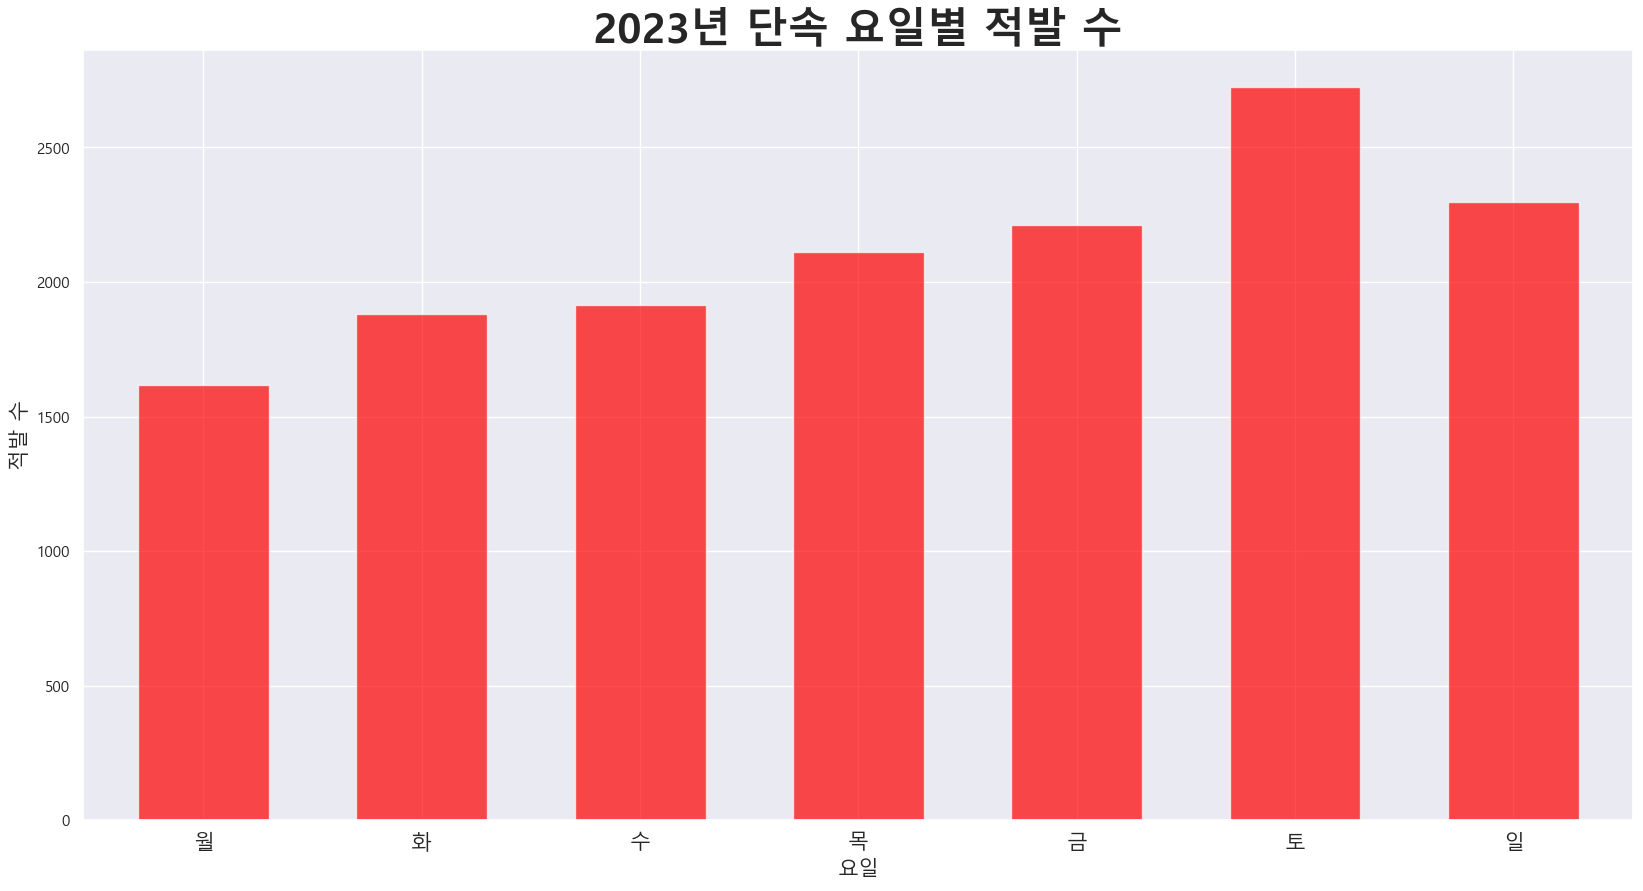

In [88]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./read_write/malgun.ttf" # 폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 요일 열에 대한 막대그래프
day_count.plot(kind='bar', figsize=(20,10), width=0.6, color='red', alpha=0.7)
plt.title('2023년 단속 요일별 적발 수', size=30, weight='bold')
plt.xlabel('요일', size=15)
plt.ylabel('적발 수', size=15)
plt.xticks(rotation=0, fontsize=15)

- 분석: 금요일과 주말에 단속 적발 수가 상대적으로 높고, 토요일이 적발 건수가 가장 많다.

### **2.2 `성별과 연령대별 단속 적발 - 막대그래프`**
- 가설2. 젊은 남성이 단속이 많이 적발될 것이다.
- 데이터1 사용

Text(0, 0.5, '적발 건수')

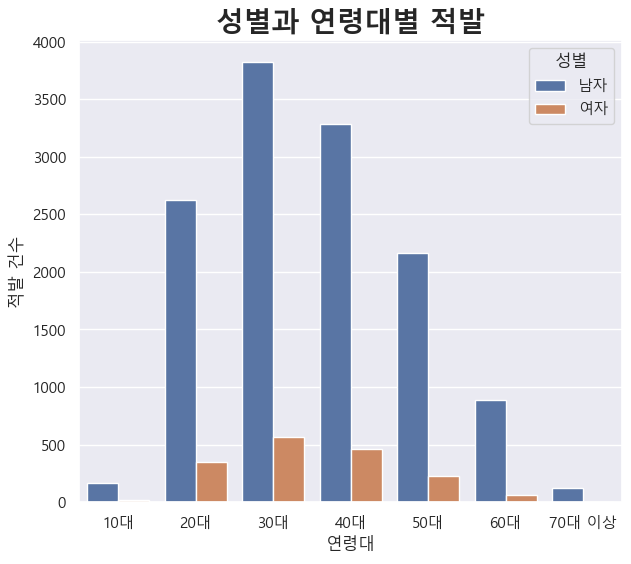

In [89]:
sns.set_theme(rc={'figure.figsize':(7,6)})
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글처리

sns.barplot(data=dd_caught_seoul, x='연령대', y='count', estimator='count', hue='성별', errorbar=None)
plt.title('성별과 연령대별 적발', size=20, weight='bold')
plt.ylabel('적발 건수')

- 분석: 전반적으로 남성의 적발건수가 여성보다 높은 패턴을 보이며, 30대 남성이 음주운전 적발 건수가 가장 많다. 30대 이후의 적발 건수는 감소하는 경향이 있다.

### **2.3 `월별 시간대 음주운전 단속 적발 - 히트맵`**
- 가설3. 겨울철 밤시간대에 단속 적발이 많을 것이다.
- 데이터1 사용

In [90]:
# 월별 시간대 피벗테이블 
dd_pt = pd.pivot_table(dd_caught_seoul, values='성별', index='시간', columns='월', aggfunc='count', fill_value=0)
dd_pt

월,1,2,3,4,5,6,7,8,9,10,11,12
시간,,,,,,,,,,,,
0,115,134,116,137,117,150,149,129,134,143,123,133
1,89,103,117,125,102,119,132,126,140,114,105,106
2,94,84,108,92,92,103,106,112,83,108,83,90
3,77,73,74,64,71,98,87,100,97,99,76,78
4,51,58,59,66,65,52,93,78,68,58,39,63
5,50,42,38,49,62,48,57,54,60,61,49,51
6,36,45,46,35,44,34,49,53,53,38,47,27
7,31,39,39,44,33,37,35,33,34,36,42,26
8,33,29,32,39,17,25,24,23,29,30,25,34


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9'),
  Text(0, 10.5, '10'),
  Text(0, 11.5, '11'),
  Text(0, 12.5, '12'),
  Text(0, 13.5, '13'),
  Text(0, 14.5, '14'),
  Text(0, 15.5, '15'),
  Text(0, 16.5, '16'),
  Text(0, 17.5, '17'),
  Text(0, 18.5, '18'),
  Text(0, 19.5, '19'),
  Text(0, 20.5, '20'),
  Text(0, 21.5, '21'),
  Text(0, 22.5, '22'),
  Text(0, 23.5, '23')])

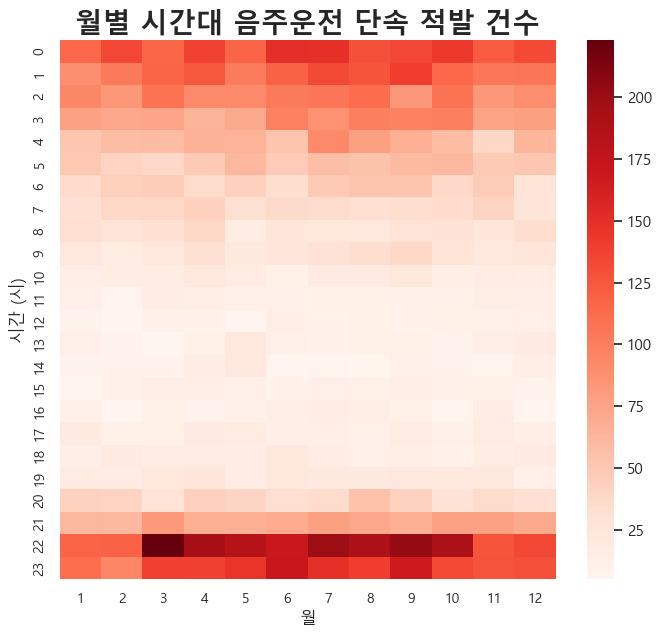

In [91]:
# 월별 시간대 음주운전 단속 적발 건수 - 히트맵 
sns.set_theme(rc={'figure.figsize':(8,7)})
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글처리
 
sns.heatmap(dd_pt, cmap='Reds', cbar=True)  

plt.title("월별 시간대 음주운전 단속 적발 건수", size=20, weight='bold')  
plt.xlabel("월", size=12)  
plt.ylabel("시간 (시)", size=12)  
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  

- 분석: 음주운전 단속이 주로 여름철(6-9월)에 집중되며, 특히 밤 10시에서 새벽 2시 사이에 적발 건수가 가장 많은 경향을 나타낸다.

### **2.4 `자치구별 적발 수와 음주운전 발생, 사상자수의 관계 - 산점도`**
 - 가설4: 적발이 많을수록 음주운전 발생건수와 사상자수가 많을 것이다.
 - 데이터2 사용

C:\Users\chs02\AppData\Local\Temp\ipykernel_1696\1985198383.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=dd_accidents.적발수[i], y=dd_accidents.발생건수[i], s=dd_accidents.index[i],


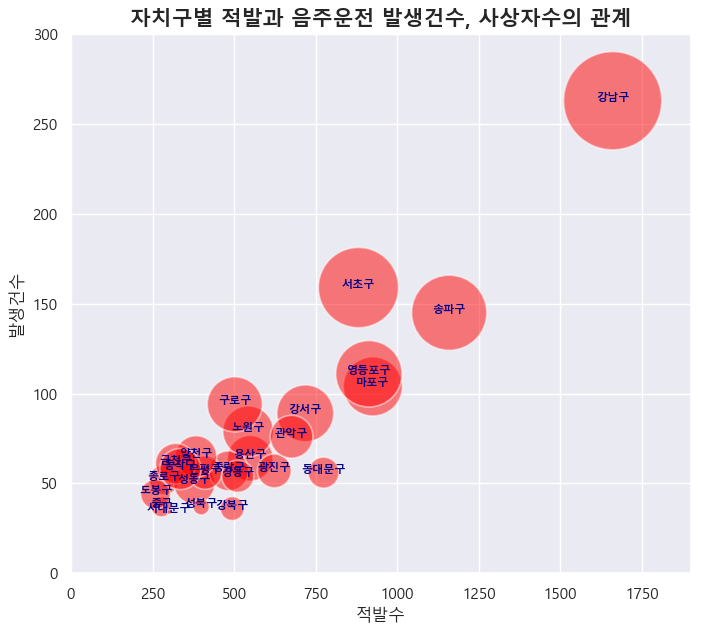

In [92]:
## 4.1 모든 자치구 시각화
sns.set_theme(rc={'figure.figsize':(8,7)})
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글처리

sns.scatterplot(data=dd_accidents, x='적발수', y='발생건수', size='사상자', sizes=(10,5000), alpha=0.5, legend=False, color='red')

plt.title('자치구별 적발과 음주운전 발생건수, 사상자수의 관계', size=15, weight='bold')
plt.xlim(0,1900)
plt.ylim(0,300)

# 버블 위에 자치구명 표시
for i in range(0, dd_accidents.shape[0]):
    plt.text(x=dd_accidents.적발수[i], y=dd_accidents.발생건수[i], s=dd_accidents.index[i],
             horizontalalignment='center', size=8, color='darkblue', weight='bold')

C:\Users\chs02\AppData\Local\Temp\ipykernel_1696\839866915.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=dd_1.적발수[i], y=dd_1.발생건수[i], s=dd_1.index[i],


(20.0, 120.0)

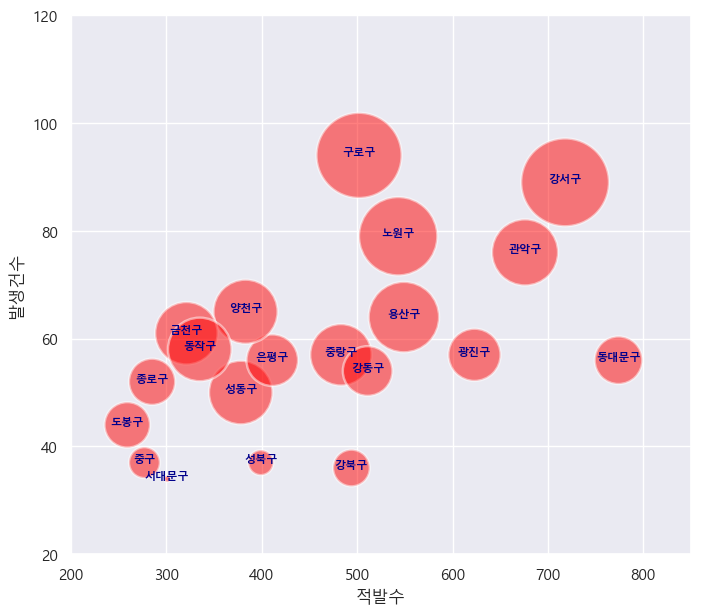

In [93]:
## (번외) 4.2 주요 5개 자치구 제외한 확대 시각화
sns.set_theme(rc={'figure.figsize':(8,7)})
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글처리

# 주요 5개 자치구 제외
dd_1 = dd_accidents[~dd_accidents.index.isin(['강남구', '서초구', '송파구', '영등포구', '마포구'])]

sns.scatterplot(data=dd_1, x='적발수', y='발생건수', size='사상자', sizes=(20,4000), alpha=0.5, legend=False, color='red')

for i in range(0, dd_1.shape[0]):
    plt.text(x=dd_1.적발수[i], y=dd_1.발생건수[i], s=dd_1.index[i],
             horizontalalignment='center', size=8, color='darkblue', weight='bold')
    
plt.xlim(200, 850)
plt.ylim(20, 120)

- 분석: 자치구별 적발 건수가 많을수록 음주운전 발생 건수와 사상자 수가 증가하는 경향이 있다.

### **2.5 `음주운전 적발과 사고 지도화 데이터`**
- 가설5. 서울시 유흥가에 음수운전 적발과 사고가 많을 것이다.
- 데이터2, 3, 4 사용

In [94]:
import folium

# GeoJSON 파일을 URL로 불러오기
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [95]:
# 5.1 서울시 자치구별 음주운전 사상자와 적발수 지도 시각화
m1 = folium.Map(
    location = [37.566345, 126.977893], zoom_start = 11
)

# 음주운전 사상자 - 자치구별 색칠
folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = dd_accidents,
    columns = [dd_accidents.index,'사상자'],
    key_on = 'feature.properties.name',
    fill_color = 'PuBu',
    fill_opacity=0.7,
    line_opacity = 0.2,
).add_to(m1)

# 음주운전 적발수 - 관할 경찰청 위치를 기준으로 원 크기
for i in range(len(police_coordinates)):
    folium.CircleMarker(location=[police_coordinates.위도.iloc[i], police_coordinates.경도.iloc[i]],
                        radius=(police_coordinates.적발수.iloc[i]**0.5)*1.5, # 원의 반지름
                        color='red',        # 원의 색
                        stroke=False,       # 윤곽선 없음
                        fill=True,          # 원의 내부 색
                        fill_opacity='50%', # 원의 내부 색 투명도
                        ).add_to(m1)
m1

- 분석: 대부분 강북보단 강남에 많이 분포되어 있다. 특히 강남구, 서초구, 송파구와 영등포구, 마포구 쪽이 적발수와 사상자가 많다.

In [96]:
# 6.2 서울시 자치구별 사상자가 높은 다발지역의 수와 해당 위치 마커 표시
m2 = folium.Map(
    location = [37.566345, 126.977893], zoom_start = 11
)

d = ddz_s23['자치구'].value_counts()

# 사상자가 높은 다발지역 - 자치구별 색칠
folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = d,
    columns = [d.index, d.values],
    key_on = 'feature.properties.name',
    fill_color = 'PuBu',
    fill_opacity=0.8,
    line_opacity = 0.3,
    nan_fill_color='white'  # 값이 NaN일 경우 흰색으로 표시
).add_to(m2)

# 음주운전 다발지역 위치를 지도에 마커 추가
for i in range(len(ddz_s23)):
    folium.Marker(location=[ddz_s23.loc[i,'위도'],
                            ddz_s23.loc[i, '경도']],
                            popup = ddz_s23.loc[i, '지점명'],
                            icon=folium.Icon(color='red', icon='glyphicon-remove')).add_to(m2)
    
m2

- 분석: 유흥가가 많이 있는 강남구 주위에 사고가 가장 많이 발생하며, 특히 음주운전 사고가 교차로에 많이 일어난다.